#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,mean_absolute_error,mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler

ds = pd.read_csv("/content/student_data.csv")
ds

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


#Loading and Exploring Dataset

In [ ]:
objectLs=[]
for i in ds.columns:
  if ds[i].dtypes=='object_':
    objectLs.append(i)
objectLs

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [ ]:
ds=pd.get_dummies(ds,columns=objectLs)

In [ ]:
ds

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,True,False,False,True,False,True,True,False,True,False
391,17,3,1,2,1,0,2,4,5,3,...,True,False,True,False,False,True,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,...,True,False,True,False,False,True,True,False,True,False
393,18,3,2,3,1,0,4,4,1,3,...,True,False,True,False,False,True,False,True,True,False


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_GP          395 non-null    bool 
 17  school_MS       

In [ ]:
X=ds.drop(columns=["G1","G2","G3"],axis=1)
y=ds.iloc[:,13:16]
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


In [ ]:
yc=ds["sex_M"]

In [ ]:
Xc=ds.drop(columns=["sex_M","sex_F"],axis=1)
Xc.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


<Axes: >

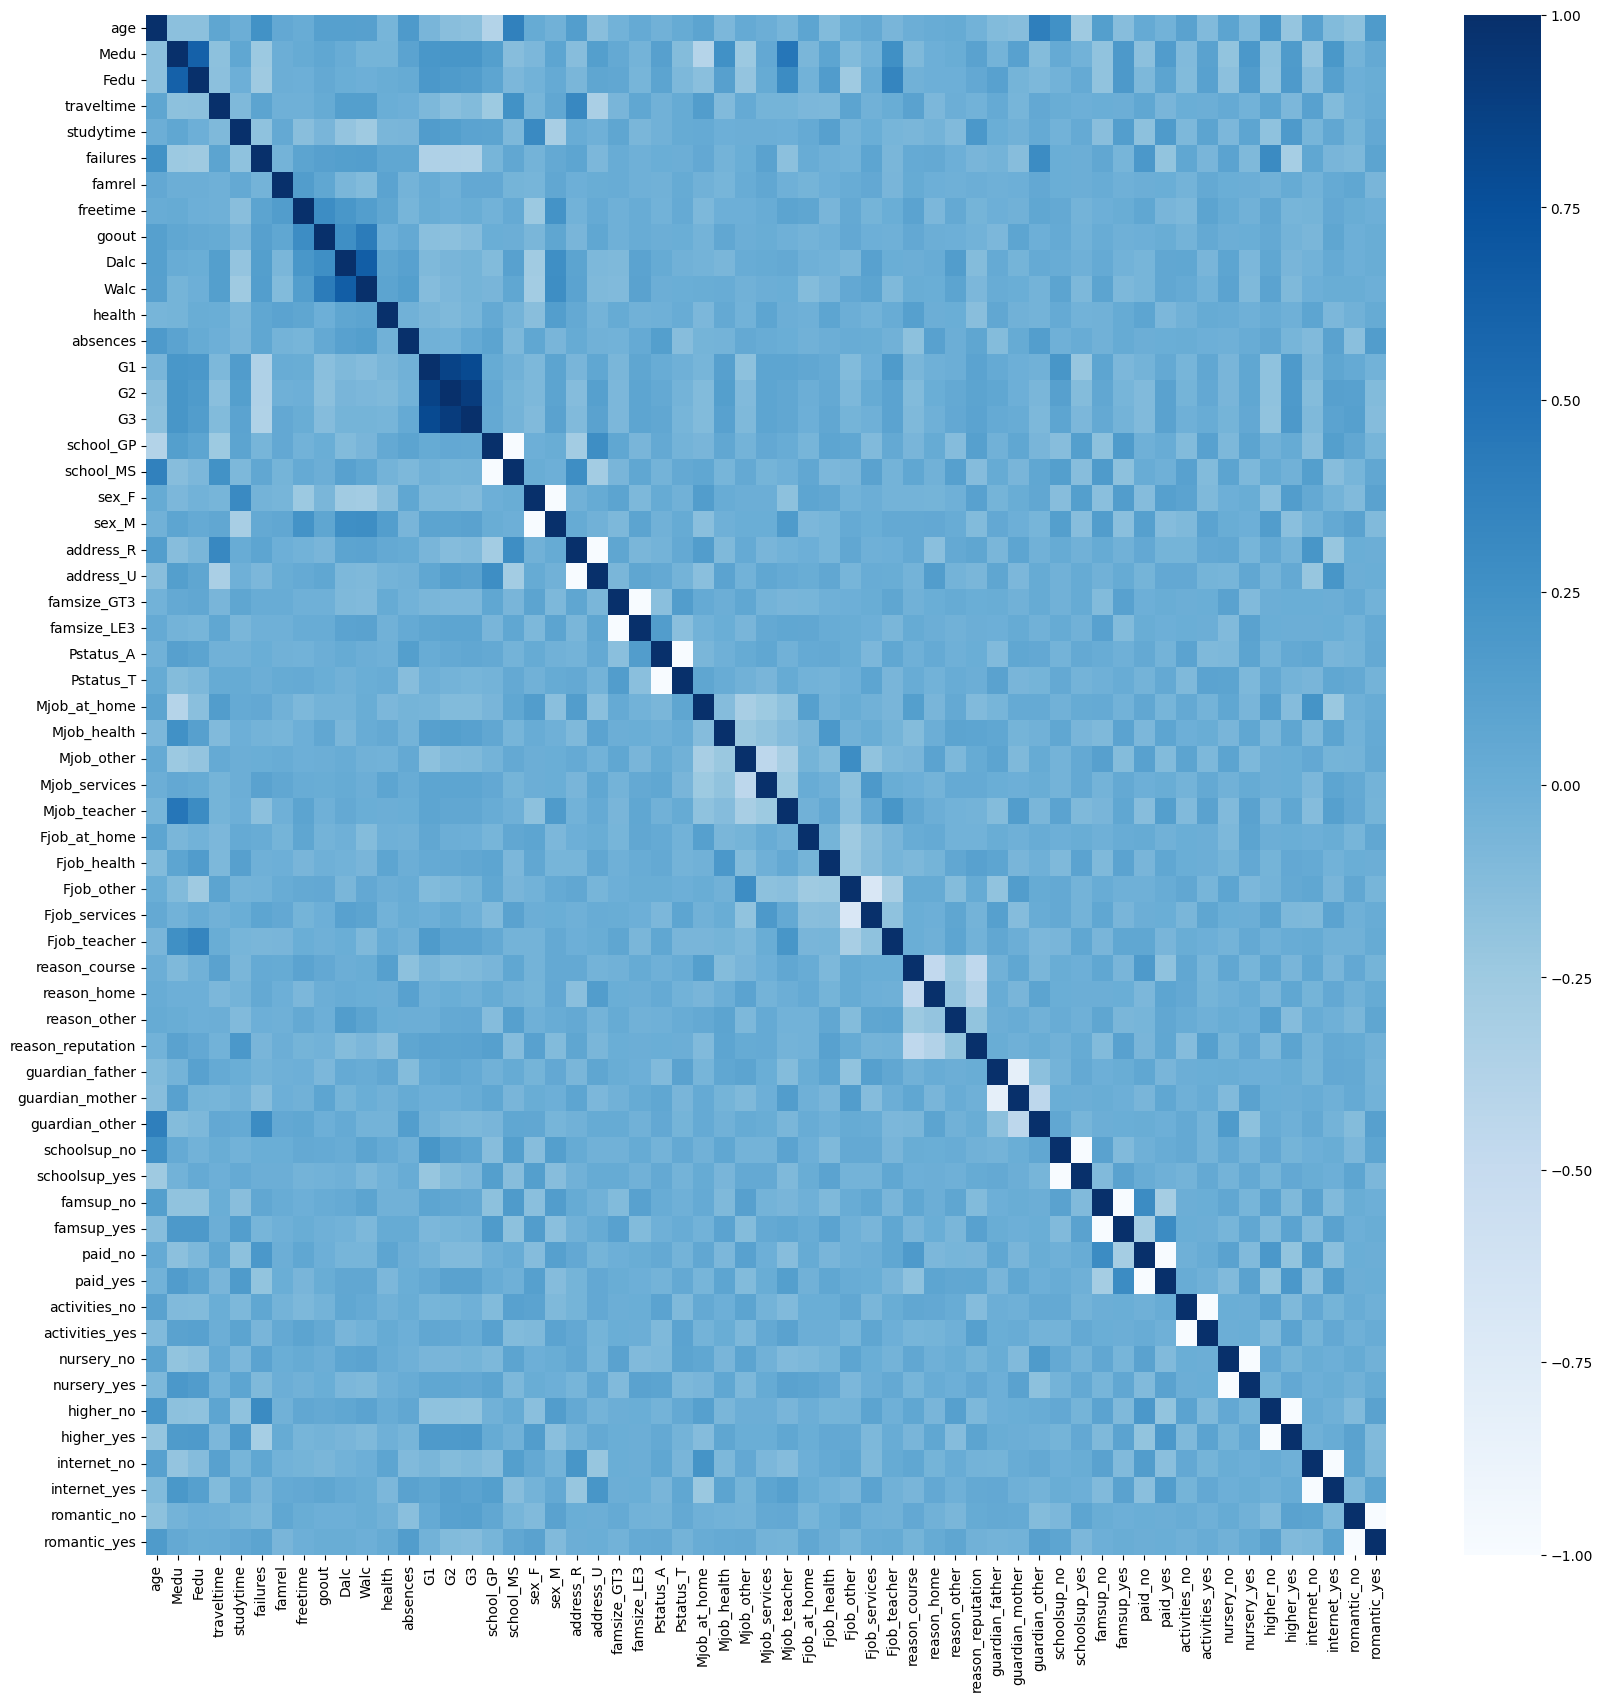

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(ds.corr(),cmap='Blues')

#Training Supervised Models

In [ ]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y["G1"],test_size=0.2,random_state=50)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y["G2"],test_size=0.2,random_state=50)
X_train3,X_test3,y_train3,y_test3 = train_test_split(X,y["G3"],test_size=0.2,random_state=50)

In [ ]:
ridge1 = Ridge()
ridge2 = Ridge()
ridge3 = Ridge()
ridge1.fit(X_train1,y_train1)
ridge2.fit(X_train2,y_train2)
ridge3.fit(X_train3,y_train3)

Ridge()

In [ ]:
print("Grade 1 Train : ",ridge1.score(X_train1,y_train1))
print("Grade 2 Train : ",ridge2.score(X_train2,y_train2))
print("Grade 3 Train : ",ridge3.score(X_train3,y_train3))
print("Grade 1 Test : ",ridge1.score(X_test1,y_test1))
print("Grade 2 Test : ",ridge2.score(X_test2,y_test2))
print("Grade 3 Test : ",ridge3.score(X_test3,y_test3))

Grade 1 Train :  0.3393128418898149
Grade 2 Train :  0.303644237799076
Grade 3 Train :  0.2883832547337811
Grade 1 Test :  0.2071864735739829
Grade 2 Test :  0.14517096226829007
Grade 3 Test :  0.09962224749845516


In [ ]:
rfr1 = RandomForestRegressor()
rfr2 = RandomForestRegressor()
rfr3 = RandomForestRegressor()
rfr1.fit(X_train1,y_train1)
rfr2.fit(X_train2,y_train2)
rfr3.fit(X_train3,y_train3)

RandomForestRegressor()

In [ ]:
print("Grade 1 Train : ",rfr1.score(X_train1,y_train1))
print("Grade 2 Train : ",rfr2.score(X_train2,y_train2))
print("Grade 3 Train : ",rfr3.score(X_train3,y_train3))
print("Grade 1 Test : ",rfr1.score(X_test1,y_test1))
print("Grade 2 Test : ",rfr2.score(X_test2,y_test2))
print("Grade 3 Test : ",rfr3.score(X_test3,y_test3))

Grade 1 Train :  0.878456705779224
Grade 2 Train :  0.8776454575117116
Grade 3 Train :  0.8989227448182355
Grade 1 Test :  0.16713478387364933
Grade 2 Test :  0.11467656992356956
Grade 3 Test :  0.23983480558727688


In [ ]:
Xc_train,Xc_test,yc_train,yc_test = train_test_split(Xc,yc,test_size=0.2,random_state=50)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(Xc_train,yc_train)

RandomForestClassifier()

In [ ]:
rfc.score(Xc_train,yc_train)

1.0

In [ ]:
rfc.score(Xc_test,yc_test)

0.7721518987341772

In [ ]:
yc_pred = rfc.predict(Xc_test)

In [ ]:
print(confusion_matrix(yc_test,yc_pred))
print(recall_score(yc_test,yc_pred))
print(accuracy_score(yc_test,yc_pred))

[[35  6]
 [12 26]]
0.6842105263157895
0.7721518987341772


In [ ]:
y_train1_pred = rfr1.predict(X_train1)
y_train2_pred = rfr2.predict(X_train2)
y_train3_pred = rfr3.predict(X_train3)
y_train1_pred1 = ridge1.predict(X_train1)
y_train2_pred1 = ridge2.predict(X_train1)
y_train3_pred1 = ridge3.predict(X_train1)

y_test1_pred = rfr1.predict(X_test1)
y_test2_pred = rfr2.predict(X_test2)
y_test3_pred = rfr3.predict(X_test3)
y_test1_pred1 = ridge1.predict(X_test1)
y_test2_pred1 = ridge2.predict(X_test1)
y_test3_pred1 = ridge3.predict(X_test1)

In [ ]:
print("Training Set : ")
print("Random Forest Regressor 1 MAE : ",mean_absolute_error(y_train1_pred ,y_train1))
print("Random Forest Regressor 2 MAE : ",mean_absolute_error(y_train2_pred ,y_train2))
print("Random Forest Regressor 3 MAE : ",mean_absolute_error(y_train3_pred ,y_train3))
print("Ridge 1 MAE : ",mean_absolute_error(y_train1_pred1,y_train1))
print("Ridge 2 MAE : ",mean_absolute_error(y_train2_pred1,y_train2))
print("Ridge 3 MAE : ",mean_absolute_error(y_train3_pred1,y_train3))
print()
print("Random Forest Regressor 1 MSE : ",mean_squared_error(y_train1_pred ,y_train1))
print("Random Forest Regressor 2 MSE : ",mean_squared_error(y_train2_pred ,y_train2))
print("Random Forest Regressor 3 MSE : ",mean_squared_error(y_train3_pred ,y_train3))
print("Ridge 1 MSE : ",mean_squared_error(y_train1_pred1,y_train1))
print("Ridge 2 MSE : ",mean_squared_error(y_train2_pred1,y_train2))
print("Ridge 3 MSE : ",mean_squared_error(y_train3_pred1,y_train3))
print()
print("Random Forest Regressor 1 RMSE : ",math.sqrt(mean_squared_error(y_train1_pred ,y_train1)))
print("Random Forest Regressor 2 RMSE : ",math.sqrt(mean_squared_error(y_train2_pred ,y_train2)))
print("Random Forest Regressor 3 RMSE : ",math.sqrt(mean_squared_error(y_train3_pred ,y_train3)))
print("Ridge 1 RMSE : ",math.sqrt(mean_squared_error(y_train1_pred1,y_train1)))
print("Ridge 2 RMSE : ",math.sqrt(mean_squared_error(y_train2_pred1,y_train2)))
print("Ridge 3 RMSE : ",math.sqrt(mean_squared_error(y_train3_pred1,y_train3)))
print()
print("Testing Set : ")
print("Random Forest Regressor 1 MAE : ",mean_absolute_error(y_test1_pred ,y_test1))
print("Random Forest Regressor 2 MAE : ",mean_absolute_error(y_test2_pred ,y_test2))
print("Random Forest Regressor 3 MAE : ",mean_absolute_error(y_test3_pred ,y_test3))
print("Ridge 1 MAE : ",mean_absolute_error(y_test1_pred1,y_test1))
print("Ridge 2 MAE : ",mean_absolute_error(y_test2_pred1,y_test2))
print("Ridge 3 MAE : ",mean_absolute_error(y_test3_pred1,y_test3))
print()
print("Random Forest Regressor 1 MSE : ",mean_squared_error(y_test1_pred ,y_test1))
print("Random Forest Regressor 2 MSE : ",mean_squared_error(y_test2_pred ,y_test2))
print("Random Forest Regressor 3 MSE : ",mean_squared_error(y_test3_pred ,y_test3))
print("Ridge 1 MSE : ",mean_squared_error(y_test1_pred1,y_test1))
print("Ridge 2 MSE : ",mean_squared_error(y_test2_pred1,y_test2))
print("Ridge 3 MSE : ",mean_squared_error(y_test3_pred1,y_test3))
print()
print("Random Forest Regressor 1 RMSE : ",math.sqrt(mean_squared_error(y_test1_pred ,y_test1)))
print("Random Forest Regressor 2 RMSE : ",math.sqrt(mean_squared_error(y_test2_pred ,y_test2)))
print("Random Forest Regressor 3 RMSE : ",math.sqrt(mean_squared_error(y_test3_pred ,y_test3)))
print("Ridge 1 RMSE : ",math.sqrt(mean_squared_error(y_test1_pred1,y_test1)))
print("Ridge 2 RMSE : ",math.sqrt(mean_squared_error(y_test2_pred1,y_test2)))
print("Ridge 3 RMSE : ",math.sqrt(mean_squared_error(y_test3_pred1,y_test3)))

Training Set : 
Random Forest Regressor 1 MAE :  0.9143987341772152
Random Forest Regressor 2 MAE :  0.9662025316455696
Random Forest Regressor 3 MAE :  1.0599999999999998
Ridge 1 MAE :  2.19855928706722
Ridge 2 MAE :  2.3231068860373867
Ridge 3 MAE :  2.9424613911010935

Random Forest Regressor 1 MSE :  1.3107775316455696
Random Forest Regressor 2 MSE :  1.565959493670886
Random Forest Regressor 3 MSE :  2.0485797468354434
Ridge 1 MSE :  7.125147362918538
Ridge 2 MSE :  8.912337005349356
Ridge 3 MSE :  14.42266758470839

Random Forest Regressor 1 RMSE :  1.1448919301163625
Random Forest Regressor 2 RMSE :  1.2513830323569544
Random Forest Regressor 3 RMSE :  1.4312860464754917
Ridge 1 RMSE :  2.6692971664688323
Ridge 2 RMSE :  2.9853537487790884
Ridge 3 RMSE :  3.7977187342809353

Testing Set : 
Random Forest Regressor 1 MAE :  2.539113924050633
Random Forest Regressor 2 MAE :  2.969873417721519
Random Forest Regressor 3 MAE :  3.0312658227848104
Ridge 1 MAE :  2.4850558780483873
Ridg

#Checking for overfitting/underfitting

In [ ]:
print(rfc.score(Xc_train,yc_train))
print(rfc.score(Xc_test,yc_test))

1.0
0.7721518987341772


In [ ]:

param_distributions = {
    'n_estimators': [int(x) for x in range(100, 1200, 100)],
    'max_depth': [None] + [int(x) for x in range(10, 110, 10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_distributions, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)


In [ ]:
random_search.fit(Xc_train, yc_train)
best_rf_random = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
print(f"Best Parameters from Random Search: {random_search.best_params_}")
print(f"Best Score from Random Search: {random_search.best_score_}")

Best Parameters from Random Search: {'n_estimators': 900, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Best Score from Random Search: 0.7088293650793651


In [ ]:
best_rf_random.score(Xc_train,yc_train)

0.9936708860759493

In [ ]:
best_rf_random.score(Xc_test,yc_test)

0.7341772151898734

In [ ]:
param_distributions = {
    'n_estimators': [int(x) for x in range(100, 1200, 100)],
    'max_depth': [None] + [int(x) for x in range(10, 110, 10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search1 = RandomizedSearchCV(estimator=rfr1, param_distributions=param_distributions, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)


In [ ]:
random_search1.fit(X_train1, y_train1)
best_rf_random1 = random_search1.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
print(f"Best Parameters from Random Search: {random_search1.best_params_}")
print(f"Best Score from Random Search: {random_search1.best_score_}")

Best Parameters from Random Search: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}
Best Score from Random Search: 0.14460802632302067


In [ ]:
param_distributions = {
    'n_estimators': [int(x) for x in range(100, 1200, 100)],
    'max_depth': [None] + [int(x) for x in range(10, 110, 10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search2 = RandomizedSearchCV(estimator=rfr2, param_distributions=param_distributions, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)


In [ ]:
random_search2.fit(X_train2, y_train2)
best_rf_random2 = random_search2.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
print(f"Best Parameters from Random Search: {random_search2.best_params_}")
print(f"Best Score from Random Search: {random_search2.best_score_}")

Best Parameters from Random Search: {'n_estimators': 1100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}
Best Score from Random Search: 0.09101197728778346


In [ ]:
param_distributions = {
    'n_estimators': [int(x) for x in range(100, 1200, 100)],
    'max_depth': [None] + [int(x) for x in range(10, 110, 10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search3 = RandomizedSearchCV(estimator=rfr3, param_distributions=param_distributions, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)


In [ ]:
random_search3.fit(X_train3, y_train3)
best_rf_random3 = random_search3.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
print(f"Best Parameters from Random Search: {random_search3.best_params_}")
print(f"Best Score from Random Search: {random_search3.best_score_}")

Best Parameters from Random Search: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}
Best Score from Random Search: 0.20242043040180704


In [ ]:
rfc=random_search.best_estimator_
rfr1=random_search1.best_estimator_
rfr2=random_search2.best_estimator_
rfr3=random_search3.best_estimator_

In [ ]:
print(rfc.score(Xc_test,yc_test))
print(rfr1.score(X_test1,y_test1))
print(rfr2.score(X_test2,y_test2))
print(rfr3.score(X_test3,y_test3))

0.7341772151898734
0.21159478033427248
0.17772385473532348
0.2520878219455588


#Unsupervised Learning

In [ ]:
ds.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

<ipython-input-80-0ba0eb68f587>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(ds['G1'], ds['G3'], cmap='Spectral')


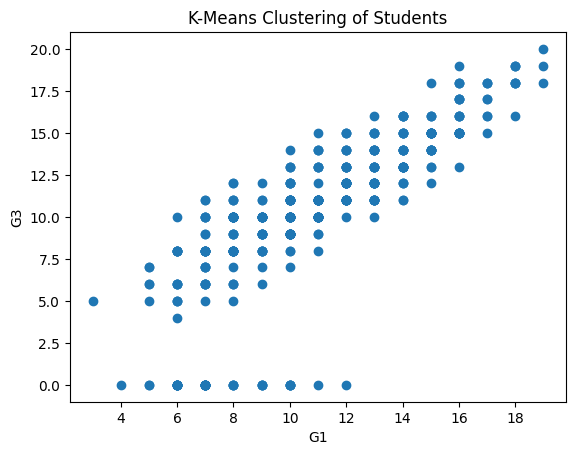

In [ ]:
continuous_features = [
    'age', 'traveltime', 'studytime', 'failures',
    'freetime','health', 'absences', 'G1', 'G2', 'G3'
]

plt.scatter(ds['G1'], ds['G3'], cmap='Spectral')
plt.xlabel('G1')
plt.ylabel('G3')
plt.title('K-Means Clustering of Students')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


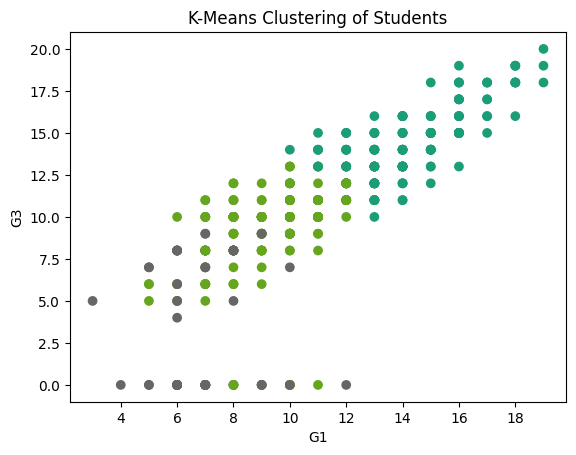

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ds[continuous_features])

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
ds['cluster'] = clusters

plt.scatter(ds['G1'], ds['G3'], c=ds['cluster'], cmap='Dark2')
plt.xlabel('G1')
plt.ylabel('G3')
plt.title('K-Means Clustering of Students')
plt.show()